In [ ]:
%pip install pandas numpy matplotlib seaborn scipy

## Import Libraries

In [1013]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from math import ceil
from scipy import stats
import seaborn as sns
from sklearn import preprocessing
from sklearn.feature_selection import VarianceThreshold
from utils.country_to_continent_mapping import country_to_continent_mapping as ccm
import warnings

In [1014]:
warnings.filterwarnings("ignore")                # ignoring warnings

## Reading Data

In [1015]:
data = pd.read_csv('Global_Education.csv', encoding='latin-1', encoding_errors='ignore')

## Data Visualization

In [1016]:
data

,Country Name,Latitude,Longitude,OOSR_Pre0Primary_Age_Male,OOSR_Pre0Primary_Age_Female,OOSR_Primary_Age_Male,OOSR_Primary_Age_Female,OOSR_Lower_Secondary_Age_Male,OOSR_Lower_Secondary_Age_Female,OOSR_Upper_Secondary_Age_Male,...,Primary_End_Proficiency_Reading,Primary_End_Proficiency_Math,Lower_Secondary_End_Proficiency_Reading,Lower_Secondary_End_Proficiency_Math,Youth_15_24_Literacy_Rate_Male,Youth_15_24_Literacy_Rate_Female,Birth_Rate,Gross_Primary_Education_Enrollment,Gross_Tertiary_Education_Enrollment,Unemployment_Rate
0,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,44,...,13,11,0,0,74,56,32.49,104.0,9.7,11.12
1,Albania,41.153332,20.168331,4,2,6,3,6,1,21,...,0,0,48,58,99,100,11.78,107.0,55.0,12.33
2,Algeria,28.033886,1.659626,0,0,0,0,0,0,0,...,0,0,21,19,98,97,24.28,109.9,51.4,11.70
3,Andorra,42.506285,1.521801,0,0,0,0,0,0,0,...,0,0,0,0,0,0,7.20,106.4,0.0,0.00
4,Angola,11.202692,17.873887,31,39,0,0,0,0,0,...,0,0,0,0,0,0,40.73,113.5,9.3,6.89
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194,Venezuela,6.423750,66.589730,14,14,10,10,15,13,28,...,0,0,0,0,0,0,17.88,97.2,79.3,8.80
195,Vietnam,14.058324,108.277199,0,0,0,0,0,0,0,...,55,51,86,81,98,98,16.75,110.6,28.5,2.01
196,Yemen,15.552727,48.516388,96,96,10,21,23,34,46,...,0,0,0,0,0,0,30.45,93.6,10.2,12.91
197,Zambia,13.133897,27.849332,0,0,17,13,0,0,0,...,0,0,5,2,93,92,36.19,98.7,4.1,11.43


Key Features

The dataset includes the following key features:

* Countries and Areas: Name of the countries and areas.
* Latitude: Latitude coordinates of the geographical location.
* Longitude: Longitude coordinates of the geographical location.
* OOSR_Pre0Primary_Age_Male: Out-of-school rate for pre-primary age males.
* OOSR_Pre0Primary_Age_Female: Out-of-school rate for pre-primary age females.
* OOSR_Primary_Age_Male: Out-of-school rate for primary age males.
* OOSR_Primary_Age_Female: Out-of-school rate for primary age females.
* OOSR_Lower_Secondary_Age_Male: Out-of-school rate for lower secondary age males.
* OOSR_Lower_Secondary_Age_Female: Out-of-school rate for lower secondary age females.
* OOSR_Upper_Secondary_Age_Male: Out-of-school rate for upper secondary age males.
* OOSR_Upper_Secondary_Age_Female: Out-of-school rate for upper secondary age females.
* Completion_Rate_Primary_Male: Completion rate for primary education among males.
* Completion_Rate_Primary_Female: Completion rate for primary education among females.
* Completion_Rate_Lower_Secondary_Male: Completion rate for lower secondary education among males.
* Completion_Rate_Lower_Secondary_Female: Completion rate for lower secondary education among females.
* Completion_Rate_Upper_Secondary_Male: Completion rate for upper secondary education among males.
* Completion_Rate_Upper_Secondary_Female: Completion rate for upper secondary education among females.
* Grade_2_3_Proficiency_Reading: Proficiency in reading for grade 2-3 students.
* Grade_2_3_Proficiency_Math: Proficiency in math for grade 2-3 students.
* Primary_End_Proficiency_Reading: Proficiency in reading at the end of primary education.
* Primary_End_Proficiency_Math: Proficiency in math at the end of primary education.
* Lower_Secondary_End_Proficiency_Reading: Proficiency in reading at the end of lower secondary education.
* Lower_Secondary_End_Proficiency_Math: Proficiency in math at the end of lower secondary education.
* Youth_15_24_Literacy_Rate_Male: Literacy rate among male youths aged 15-24.
* Youth_15_24_Literacy_Rate_Female: Literacy rate among female youths aged 15-24.
* Birth_Rate: Birth rate in the respective countries/areas.
* Gross_Primary_Education_Enrollment: Gross enrollment in primary education.
* Gross_Tertiary_Education_Enrollment: Gross enrollment in tertiary education.
* Unemployment_Rate: Unemployment rate in the respective countries/areas.



# Feature Engineering
In this code below we try to map the country name to it's continent, then add an additional column to the data frame that contains the continent name. I have a mapping from country name to continent name inside a dictionary `ccm`. I will use that to add an additional feature named continent to the dataframe.

In [1017]:
# add a column named continent into the data
data['Country Name'] = data['Country Name'].str.lower()
data['Continent'] = data['Country Name'].map(ccm)

data = data.drop(columns=['Country Name'])
data.columns
data

,Latitude,Longitude,OOSR_Pre0Primary_Age_Male,OOSR_Pre0Primary_Age_Female,OOSR_Primary_Age_Male,OOSR_Primary_Age_Female,OOSR_Lower_Secondary_Age_Male,OOSR_Lower_Secondary_Age_Female,OOSR_Upper_Secondary_Age_Male,OOSR_Upper_Secondary_Age_Female,...,Primary_End_Proficiency_Math,Lower_Secondary_End_Proficiency_Reading,Lower_Secondary_End_Proficiency_Math,Youth_15_24_Literacy_Rate_Male,Youth_15_24_Literacy_Rate_Female,Birth_Rate,Gross_Primary_Education_Enrollment,Gross_Tertiary_Education_Enrollment,Unemployment_Rate,Continent
0,33.939110,67.709953,0,0,0,0,0,0,44,69,...,11,0,0,74,56,32.49,104.0,9.7,11.12,asia
1,41.153332,20.168331,4,2,6,3,6,1,21,15,...,0,48,58,99,100,11.78,107.0,55.0,12.33,europe
2,28.033886,1.659626,0,0,0,0,0,0,0,0,...,0,21,19,98,97,24.28,109.9,51.4,11.70,africa
3,42.506285,1.521801,0,0,0,0,0,0,0,0,...,0,0,0,0,0,7.20,106.4,0.0,0.00,europe
4,11.202692,17.873887,31,39,0,0,0,0,0,0,...,0,0,0,0,0,40.73,113.5,9.3,6.89,africa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194,6.423750,66.589730,14,14,10,10,15,13,28,19,...,0,0,0,0,0,17.88,97.2,79.3,8.80,south america
195,14.058324,108.277199,0,0,0,0,0,0,0,0,...,51,86,81,98,98,16.75,110.6,28.5,2.01,asia
196,15.552727,48.516388,96,96,10,21,23,34,46,68,...,0,0,0,0,0,30.45,93.6,10.2,12.91,asia
197,13.133897,27.849332,0,0,17,13,0,0,0,0,...,0,5,2,93,92,36.19,98.7,4.1,11.43,africa


## Handling Missing values

In [1018]:
data = data.dropna()
data

# unfortunately this dataset has no empty values so no rows have been dropped

,Latitude,Longitude,OOSR_Pre0Primary_Age_Male,OOSR_Pre0Primary_Age_Female,OOSR_Primary_Age_Male,OOSR_Primary_Age_Female,OOSR_Lower_Secondary_Age_Male,OOSR_Lower_Secondary_Age_Female,OOSR_Upper_Secondary_Age_Male,OOSR_Upper_Secondary_Age_Female,...,Primary_End_Proficiency_Math,Lower_Secondary_End_Proficiency_Reading,Lower_Secondary_End_Proficiency_Math,Youth_15_24_Literacy_Rate_Male,Youth_15_24_Literacy_Rate_Female,Birth_Rate,Gross_Primary_Education_Enrollment,Gross_Tertiary_Education_Enrollment,Unemployment_Rate,Continent
0,33.939110,67.709953,0,0,0,0,0,0,44,69,...,11,0,0,74,56,32.49,104.0,9.7,11.12,asia
1,41.153332,20.168331,4,2,6,3,6,1,21,15,...,0,48,58,99,100,11.78,107.0,55.0,12.33,europe
2,28.033886,1.659626,0,0,0,0,0,0,0,0,...,0,21,19,98,97,24.28,109.9,51.4,11.70,africa
3,42.506285,1.521801,0,0,0,0,0,0,0,0,...,0,0,0,0,0,7.20,106.4,0.0,0.00,europe
4,11.202692,17.873887,31,39,0,0,0,0,0,0,...,0,0,0,0,0,40.73,113.5,9.3,6.89,africa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194,6.423750,66.589730,14,14,10,10,15,13,28,19,...,0,0,0,0,0,17.88,97.2,79.3,8.80,south america
195,14.058324,108.277199,0,0,0,0,0,0,0,0,...,51,86,81,98,98,16.75,110.6,28.5,2.01,asia
196,15.552727,48.516388,96,96,10,21,23,34,46,68,...,0,0,0,0,0,30.45,93.6,10.2,12.91,asia
197,13.133897,27.849332,0,0,17,13,0,0,0,0,...,0,5,2,93,92,36.19,98.7,4.1,11.43,africa


In [1019]:
data.describe()

,Latitude,Longitude,OOSR_Pre0Primary_Age_Male,OOSR_Pre0Primary_Age_Female,OOSR_Primary_Age_Male,OOSR_Primary_Age_Female,OOSR_Lower_Secondary_Age_Male,OOSR_Lower_Secondary_Age_Female,OOSR_Upper_Secondary_Age_Male,OOSR_Upper_Secondary_Age_Female,...,Primary_End_Proficiency_Reading,Primary_End_Proficiency_Math,Lower_Secondary_End_Proficiency_Reading,Lower_Secondary_End_Proficiency_Math,Youth_15_24_Literacy_Rate_Male,Youth_15_24_Literacy_Rate_Female,Birth_Rate,Gross_Primary_Education_Enrollment,Gross_Tertiary_Education_Enrollment,Unemployment_Rate
count,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,...,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000
mean,25.324173,55.727703,19.351759,18.989950,5.180905,5.457286,8.763819,8.914573,20.432161,20.105528,...,10.793970,10.502513,26.175879,24.819095,34.949749,34.236181,18.875528,95.301508,34.779899,5.975678
std,16.752978,46.075709,24.802185,24.992522,9.416160,10.402842,13.335587,14.815967,21.594382,23.269261,...,25.026506,22.627612,33.278504,32.063659,45.335088,45.041502,10.743855,29.199133,30.026360,5.264002
min,0.023559,0.824782,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,11.814443,18.876521,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.370000,97.200000,9.000000,2.315000
50%,21.236736,45.038189,9.000000,7.000000,1.000000,1.000000,2.000000,2.000000,15.000000,12.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.550000,101.800000,26.200000,4.580000
75%,40.106102,77.982287,31.000000,30.000000,6.000000,6.000000,13.000000,11.000000,33.000000,30.000000,...,0.000000,0.000000,57.000000,51.500000,94.000000,96.000000,27.085000,107.450000,60.250000,8.400000
max,64.963051,178.065032,96.000000,96.000000,58.000000,67.000000,61.000000,70.000000,84.000000,89.000000,...,99.000000,89.000000,89.000000,94.000000,100.000000,100.000000,46.080000,142.500000,136.600000,28.180000


## Plot Distribution of Data

Let's plot the chart for the distribution of data across the columns to understand the data better.

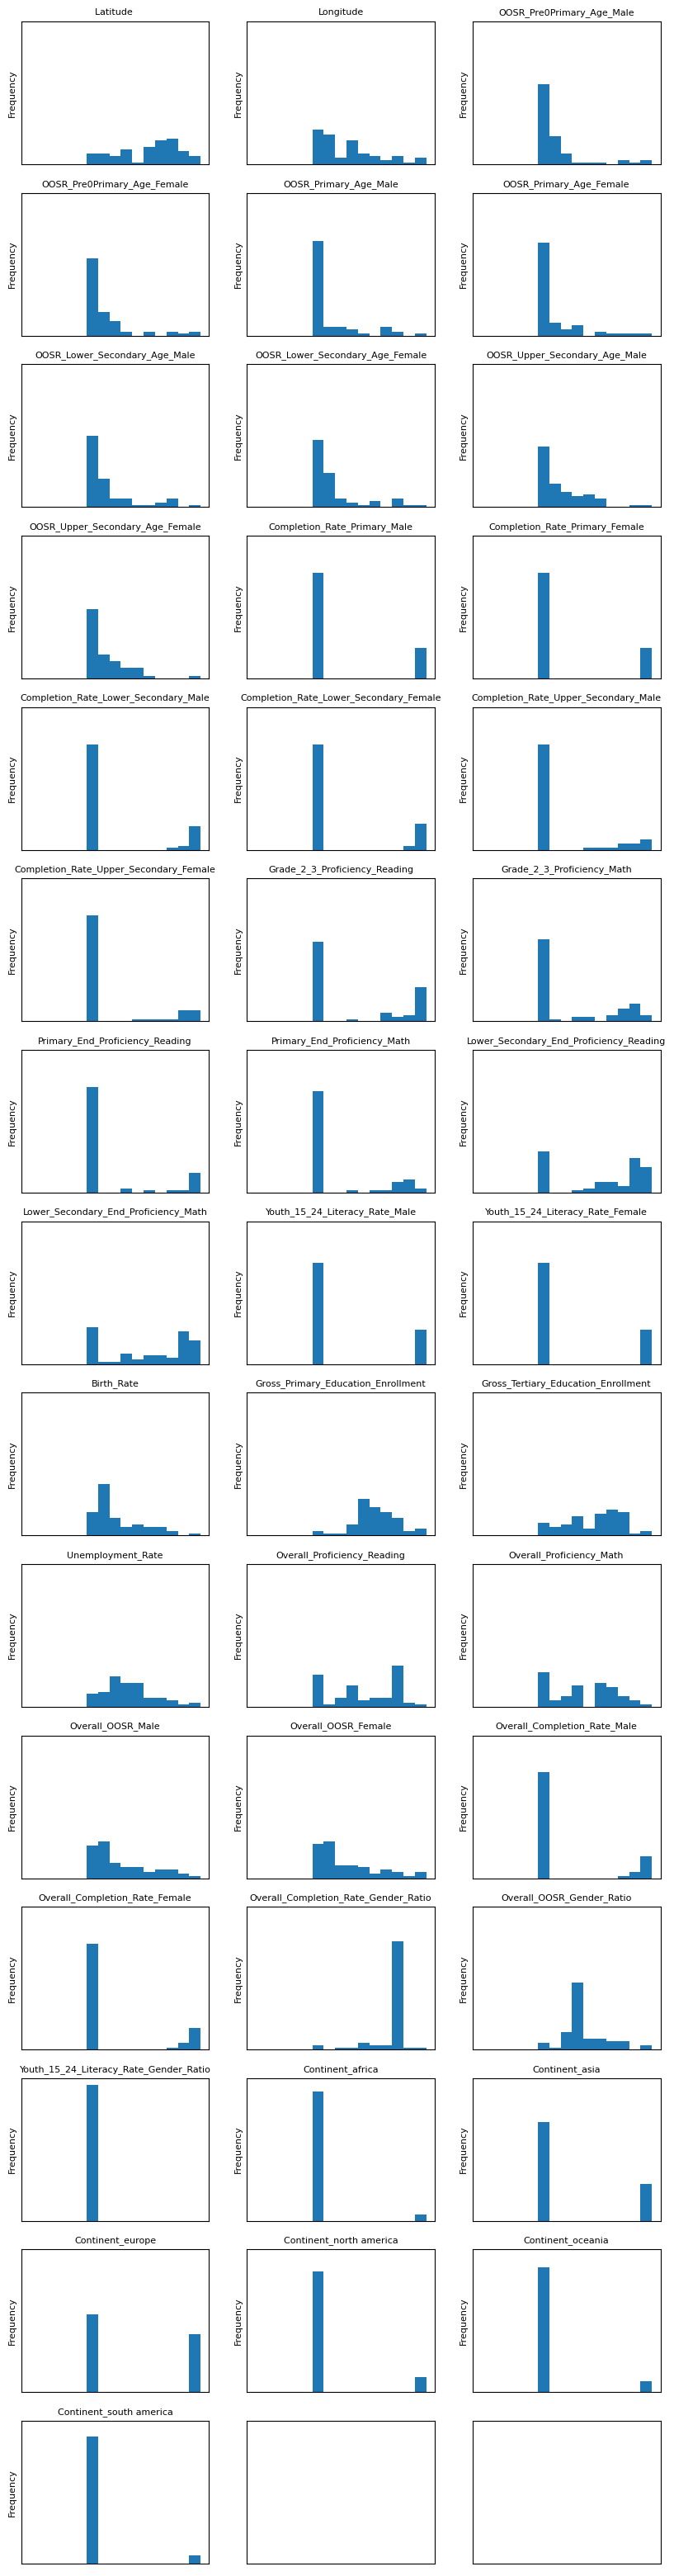

In [1044]:

# plot the data
columns = data.columns

# create a subplot for each column
nCols = 3
nRows = ceil(len(columns)/nCols)
fig, axs = plt.subplots(nRows, nCols, figsize=(10, 40), sharey=True, sharex=True, squeeze=False, subplot_kw={'xticks': [], 'yticks': []})

# plot each column
for i in range(len(columns)):
    axs[i//nCols, i%nCols].hist(data[columns[i]])
    axs[i//nCols, i%nCols].set_title(columns[i], fontsize=8)
    axs[i//nCols, i%nCols].set_ylabel('Frequency', fontsize=8)

# show the plot
plt.show()

In [1021]:


pseudo_count = 0.1

# this avoids division by zero
data.replace(0.0, pseudo_count, inplace=True)
data.replace(0, pseudo_count, inplace=True)

data

,Latitude,Longitude,OOSR_Pre0Primary_Age_Male,OOSR_Pre0Primary_Age_Female,OOSR_Primary_Age_Male,OOSR_Primary_Age_Female,OOSR_Lower_Secondary_Age_Male,OOSR_Lower_Secondary_Age_Female,OOSR_Upper_Secondary_Age_Male,OOSR_Upper_Secondary_Age_Female,...,Primary_End_Proficiency_Math,Lower_Secondary_End_Proficiency_Reading,Lower_Secondary_End_Proficiency_Math,Youth_15_24_Literacy_Rate_Male,Youth_15_24_Literacy_Rate_Female,Birth_Rate,Gross_Primary_Education_Enrollment,Gross_Tertiary_Education_Enrollment,Unemployment_Rate,Continent
0,33.939110,67.709953,0.1,0.1,0.1,0.1,0.1,0.1,44.0,69.0,...,11.0,0.1,0.1,74.0,56.0,32.49,104.0,9.7,11.12,asia
1,41.153332,20.168331,4.0,2.0,6.0,3.0,6.0,1.0,21.0,15.0,...,0.1,48.0,58.0,99.0,100.0,11.78,107.0,55.0,12.33,europe
2,28.033886,1.659626,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,...,0.1,21.0,19.0,98.0,97.0,24.28,109.9,51.4,11.70,africa
3,42.506285,1.521801,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,...,0.1,0.1,0.1,0.1,0.1,7.20,106.4,0.1,0.10,europe
4,11.202692,17.873887,31.0,39.0,0.1,0.1,0.1,0.1,0.1,0.1,...,0.1,0.1,0.1,0.1,0.1,40.73,113.5,9.3,6.89,africa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194,6.423750,66.589730,14.0,14.0,10.0,10.0,15.0,13.0,28.0,19.0,...,0.1,0.1,0.1,0.1,0.1,17.88,97.2,79.3,8.80,south america
195,14.058324,108.277199,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,...,51.0,86.0,81.0,98.0,98.0,16.75,110.6,28.5,2.01,asia
196,15.552727,48.516388,96.0,96.0,10.0,21.0,23.0,34.0,46.0,68.0,...,0.1,0.1,0.1,0.1,0.1,30.45,93.6,10.2,12.91,asia
197,13.133897,27.849332,0.1,0.1,17.0,13.0,0.1,0.1,0.1,0.1,...,0.1,5.0,2.0,93.0,92.0,36.19,98.7,4.1,11.43,africa


## Advanced Feature Engineering
In this step, we'll try to combine features to create a new feature. In the dataset we have lots of features, we could combine different columns to create a new feature. This is called feature engineering.

For Example:
> We can combine the following features to create a new feature called Overall

*  Overall_Proficiency_Reading: combining Grade_2_3_Proficiency_Reading, Primary_End_Proficiency_Reading, and Lower_Secondary_End_Proficiency_Reading.

* Overall_Proficiency_Math: combining Grade_2_3_Proficiency_Math, Primary_End_Proficiency_Math, Lower_Secondary_End_Proficiency_Math

* Overall_OSSR: by combining Male and Female out-of-school rates from pre-primary, primary, lower secondary and upper secondary education.

* Overall_Completion_Rate: by combining Male and Female completion rates from primary, lower secondary and upper secondary education.

> We can do Male / Female to engineer a new feature that would give us insight into the gender disparity, which could also be a good indication to the country's level.

* OOSR_Pre0Primary_Ratio = OOSR_Pre0Primary_Age_Male / OOSR_Pre0Primary_Age_Female

* Completion_Rate_Primary_Ratio = Completion_Rate_Primary_Male / Completion_Rate_Primary_Female

In [1022]:
data.columns

Index(['Latitude ', 'Longitude', 'OOSR_Pre0Primary_Age_Male',
       'OOSR_Pre0Primary_Age_Female', 'OOSR_Primary_Age_Male',
       'OOSR_Primary_Age_Female', 'OOSR_Lower_Secondary_Age_Male',
       'OOSR_Lower_Secondary_Age_Female', 'OOSR_Upper_Secondary_Age_Male',
       'OOSR_Upper_Secondary_Age_Female', 'Completion_Rate_Primary_Male',
       'Completion_Rate_Primary_Female',
       'Completion_Rate_Lower_Secondary_Male',
       'Completion_Rate_Lower_Secondary_Female',
       'Completion_Rate_Upper_Secondary_Male',
       'Completion_Rate_Upper_Secondary_Female',
       'Grade_2_3_Proficiency_Reading', 'Grade_2_3_Proficiency_Math',
       'Primary_End_Proficiency_Reading', 'Primary_End_Proficiency_Math',
       'Lower_Secondary_End_Proficiency_Reading',
       'Lower_Secondary_End_Proficiency_Math',
       'Youth_15_24_Literacy_Rate_Male', 'Youth_15_24_Literacy_Rate_Female',
       'Birth_Rate', 'Gross_Primary_Education_Enrollment',
       'Gross_Tertiary_Education_Enrollment', 'Un

In [1023]:
# let's create Overall_Proficienty Reading Feature
data['Overall_Proficiency_Reading'] = data['Primary_End_Proficiency_Reading'] + \
        data['Lower_Secondary_End_Proficiency_Reading'] + \
        data['Grade_2_3_Proficiency_Reading']


In [1024]:
# let's create Overall_Proficiency_Math Feature
data['Overall_Proficiency_Math'] = data['Primary_End_Proficiency_Math'] + \
        data['Lower_Secondary_End_Proficiency_Math'] + \
        data['Grade_2_3_Proficiency_Math']


In [1025]:
# Let's create overall ossr (out of school secondary rate) feature
data['Overall_OOSR_Male'] = data['OOSR_Pre0Primary_Age_Male'] + \
        data['OOSR_Primary_Age_Male'] + data['OOSR_Lower_Secondary_Age_Male']  + \
        data['OOSR_Upper_Secondary_Age_Male']

data['Overall_OOSR_Female'] =  data['OOSR_Pre0Primary_Age_Female'] + \
        data['OOSR_Primary_Age_Female'] + data['OOSR_Lower_Secondary_Age_Female'] + \
        data['OOSR_Upper_Secondary_Age_Male']


In [1026]:
# Let's create overall ossr (out of school secondary rate) feature
data['Overall_Completion_Rate_Male'] = data['Completion_Rate_Primary_Male'] +  \
        data['Completion_Rate_Lower_Secondary_Male'] +  data['Completion_Rate_Upper_Secondary_Male']

data['Overall_Completion_Rate_Female'] = data['Completion_Rate_Primary_Female'] +\
        data['Completion_Rate_Lower_Secondary_Female'] + data['Completion_Rate_Upper_Secondary_Female']


Now we can ratio male and female to get insight into the gender disparity, which could also be a good indication to the country's level.

In [1027]:
# Let's ratio the overall completion rate between male and female
data['Overall_Completion_Rate_Gender_Ratio'] = data['Overall_Completion_Rate_Male'] / data['Overall_Completion_Rate_Female']

# Let's ratio the Overall OSSR between male and female
data['Overall_OOSR_Gender_Ratio'] = data['Overall_OOSR_Male'] / data['Overall_OOSR_Female']

# Let's ratio the Youth_15_24 literacy rate between male and female
data['Youth_15_24_Literacy_Rate_Gender_Ratio'] = data['Youth_15_24_Literacy_Rate_Male'] / data['Youth_15_24_Literacy_Rate_Female']

In [1028]:
data

,Latitude,Longitude,OOSR_Pre0Primary_Age_Male,OOSR_Pre0Primary_Age_Female,OOSR_Primary_Age_Male,OOSR_Primary_Age_Female,OOSR_Lower_Secondary_Age_Male,OOSR_Lower_Secondary_Age_Female,OOSR_Upper_Secondary_Age_Male,OOSR_Upper_Secondary_Age_Female,...,Continent,Overall_Proficiency_Reading,Overall_Proficiency_Math,Overall_OOSR_Male,Overall_OOSR_Female,Overall_Completion_Rate_Male,Overall_Completion_Rate_Female,Overall_Completion_Rate_Gender_Ratio,Overall_OOSR_Gender_Ratio,Youth_15_24_Literacy_Rate_Gender_Ratio
0,33.939110,67.709953,0.1,0.1,0.1,0.1,0.1,0.1,44.0,69.0,...,asia,35.1,36.1,44.3,44.3,148.0,80.0,1.850000,1.000000,1.321429
1,41.153332,20.168331,4.0,2.0,6.0,3.0,6.0,1.0,21.0,15.0,...,europe,48.2,58.2,37.0,27.0,268.0,273.0,0.981685,1.370370,0.990000
2,28.033886,1.659626,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,...,africa,21.2,19.2,0.4,0.4,164.0,195.0,0.841026,1.000000,1.010309
3,42.506285,1.521801,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,...,europe,0.3,0.3,0.4,0.4,0.3,0.3,1.000000,1.000000,1.000000
4,11.202692,17.873887,31.0,39.0,0.1,0.1,0.1,0.1,0.1,0.1,...,africa,0.3,0.3,31.3,39.3,129.0,104.0,1.240385,0.796438,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194,6.423750,66.589730,14.0,14.0,10.0,10.0,15.0,13.0,28.0,19.0,...,south america,0.3,0.3,67.0,65.0,0.3,0.3,1.000000,1.030769,1.000000
195,14.058324,108.277199,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,...,asia,141.1,132.1,0.4,0.4,227.0,245.0,0.926531,1.000000,1.000000
196,15.552727,48.516388,96.0,96.0,10.0,21.0,23.0,34.0,46.0,68.0,...,asia,0.3,0.3,175.0,197.0,162.0,117.0,1.384615,0.888325,1.000000
197,13.133897,27.849332,0.1,0.1,17.0,13.0,0.1,0.1,0.1,0.1,...,africa,5.2,2.2,17.3,13.3,158.0,150.0,1.053333,1.300752,1.010870


In [1029]:
data.head()

,Latitude,Longitude,OOSR_Pre0Primary_Age_Male,OOSR_Pre0Primary_Age_Female,OOSR_Primary_Age_Male,OOSR_Primary_Age_Female,OOSR_Lower_Secondary_Age_Male,OOSR_Lower_Secondary_Age_Female,OOSR_Upper_Secondary_Age_Male,OOSR_Upper_Secondary_Age_Female,...,Continent,Overall_Proficiency_Reading,Overall_Proficiency_Math,Overall_OOSR_Male,Overall_OOSR_Female,Overall_Completion_Rate_Male,Overall_Completion_Rate_Female,Overall_Completion_Rate_Gender_Ratio,Overall_OOSR_Gender_Ratio,Youth_15_24_Literacy_Rate_Gender_Ratio
0,33.939110,67.709953,0.1,0.1,0.1,0.1,0.1,0.1,44.0,69.0,...,asia,35.1,36.1,44.3,44.3,148.0,80.0,1.850000,1.000000,1.321429
1,41.153332,20.168331,4.0,2.0,6.0,3.0,6.0,1.0,21.0,15.0,...,europe,48.2,58.2,37.0,27.0,268.0,273.0,0.981685,1.370370,0.990000
2,28.033886,1.659626,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,...,africa,21.2,19.2,0.4,0.4,164.0,195.0,0.841026,1.000000,1.010309
3,42.506285,1.521801,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,...,europe,0.3,0.3,0.4,0.4,0.3,0.3,1.000000,1.000000,1.000000
4,11.202692,17.873887,31.0,39.0,0.1,0.1,0.1,0.1,0.1,0.1,...,africa,0.3,0.3,31.3,39.3,129.0,104.0,1.240385,0.796438,1.000000


## Encoding
### One Hot Encoding
Here we have 7 continents in the data now. To represent them numerically in the dataset we use onw hot encoding.

In [1030]:
data.dtypes


Latitude                                   float64
Longitude                                  float64
OOSR_Pre0Primary_Age_Male                  float64
OOSR_Pre0Primary_Age_Female                float64
OOSR_Primary_Age_Male                      float64
OOSR_Primary_Age_Female                    float64
OOSR_Lower_Secondary_Age_Male              float64
OOSR_Lower_Secondary_Age_Female            float64
OOSR_Upper_Secondary_Age_Male              float64
OOSR_Upper_Secondary_Age_Female            float64
Completion_Rate_Primary_Male               float64
Completion_Rate_Primary_Female             float64
Completion_Rate_Lower_Secondary_Male       float64
Completion_Rate_Lower_Secondary_Female     float64
Completion_Rate_Upper_Secondary_Male       float64
Completion_Rate_Upper_Secondary_Female     float64
Grade_2_3_Proficiency_Reading              float64
Grade_2_3_Proficiency_Math                 float64
Primary_End_Proficiency_Reading            float64
Primary_End_Proficiency_Math   

In [1031]:
encoder = preprocessing.OneHotEncoder(sparse_output=False)
encoded_column = encoder.fit_transform(data[["Continent"]])

encoder.get_feature_names_out(['Continent'])
encoded_df = pd.DataFrame(encoded_column, columns= encoder.get_feature_names_out(['Continent']))
encoded_df

,Continent_africa,Continent_asia,Continent_europe,Continent_north america,Continent_oceania,Continent_south america
0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...
194,0.0,0.0,0.0,0.0,0.0,1.0
195,0.0,1.0,0.0,0.0,0.0,0.0
196,0.0,1.0,0.0,0.0,0.0,0.0
197,1.0,0.0,0.0,0.0,0.0,0.0


In [1032]:
# concatenating the encoded df to the original data
data_encoded = pd.concat([data, encoded_df], axis=1)

data_encoded.drop('Continent', axis=1, inplace=True)
data = data_encoded
data

,Latitude,Longitude,OOSR_Pre0Primary_Age_Male,OOSR_Pre0Primary_Age_Female,OOSR_Primary_Age_Male,OOSR_Primary_Age_Female,OOSR_Lower_Secondary_Age_Male,OOSR_Lower_Secondary_Age_Female,OOSR_Upper_Secondary_Age_Male,OOSR_Upper_Secondary_Age_Female,...,Overall_Completion_Rate_Female,Overall_Completion_Rate_Gender_Ratio,Overall_OOSR_Gender_Ratio,Youth_15_24_Literacy_Rate_Gender_Ratio,Continent_africa,Continent_asia,Continent_europe,Continent_north america,Continent_oceania,Continent_south america
0,33.939110,67.709953,0.1,0.1,0.1,0.1,0.1,0.1,44.0,69.0,...,80.0,1.850000,1.000000,1.321429,0.0,1.0,0.0,0.0,0.0,0.0
1,41.153332,20.168331,4.0,2.0,6.0,3.0,6.0,1.0,21.0,15.0,...,273.0,0.981685,1.370370,0.990000,0.0,0.0,1.0,0.0,0.0,0.0
2,28.033886,1.659626,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,...,195.0,0.841026,1.000000,1.010309,1.0,0.0,0.0,0.0,0.0,0.0
3,42.506285,1.521801,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,...,0.3,1.000000,1.000000,1.000000,0.0,0.0,1.0,0.0,0.0,0.0
4,11.202692,17.873887,31.0,39.0,0.1,0.1,0.1,0.1,0.1,0.1,...,104.0,1.240385,0.796438,1.000000,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194,6.423750,66.589730,14.0,14.0,10.0,10.0,15.0,13.0,28.0,19.0,...,0.3,1.000000,1.030769,1.000000,0.0,0.0,0.0,0.0,0.0,1.0
195,14.058324,108.277199,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,...,245.0,0.926531,1.000000,1.000000,0.0,1.0,0.0,0.0,0.0,0.0
196,15.552727,48.516388,96.0,96.0,10.0,21.0,23.0,34.0,46.0,68.0,...,117.0,1.384615,0.888325,1.000000,0.0,1.0,0.0,0.0,0.0,0.0
197,13.133897,27.849332,0.1,0.1,17.0,13.0,0.1,0.1,0.1,0.1,...,150.0,1.053333,1.300752,1.010870,1.0,0.0,0.0,0.0,0.0,0.0


## Handling Outliers

From the above chart, we can see that there are outliers in the data. Let's handle them.

In [1033]:
data.columns

Index(['Latitude ', 'Longitude', 'OOSR_Pre0Primary_Age_Male',
       'OOSR_Pre0Primary_Age_Female', 'OOSR_Primary_Age_Male',
       'OOSR_Primary_Age_Female', 'OOSR_Lower_Secondary_Age_Male',
       'OOSR_Lower_Secondary_Age_Female', 'OOSR_Upper_Secondary_Age_Male',
       'OOSR_Upper_Secondary_Age_Female', 'Completion_Rate_Primary_Male',
       'Completion_Rate_Primary_Female',
       'Completion_Rate_Lower_Secondary_Male',
       'Completion_Rate_Lower_Secondary_Female',
       'Completion_Rate_Upper_Secondary_Male',
       'Completion_Rate_Upper_Secondary_Female',
       'Grade_2_3_Proficiency_Reading', 'Grade_2_3_Proficiency_Math',
       'Primary_End_Proficiency_Reading', 'Primary_End_Proficiency_Math',
       'Lower_Secondary_End_Proficiency_Reading',
       'Lower_Secondary_End_Proficiency_Math',
       'Youth_15_24_Literacy_Rate_Male', 'Youth_15_24_Literacy_Rate_Female',
       'Birth_Rate', 'Gross_Primary_Education_Enrollment',
       'Gross_Tertiary_Education_Enrollment', 'Un

## Visualizing Outliers

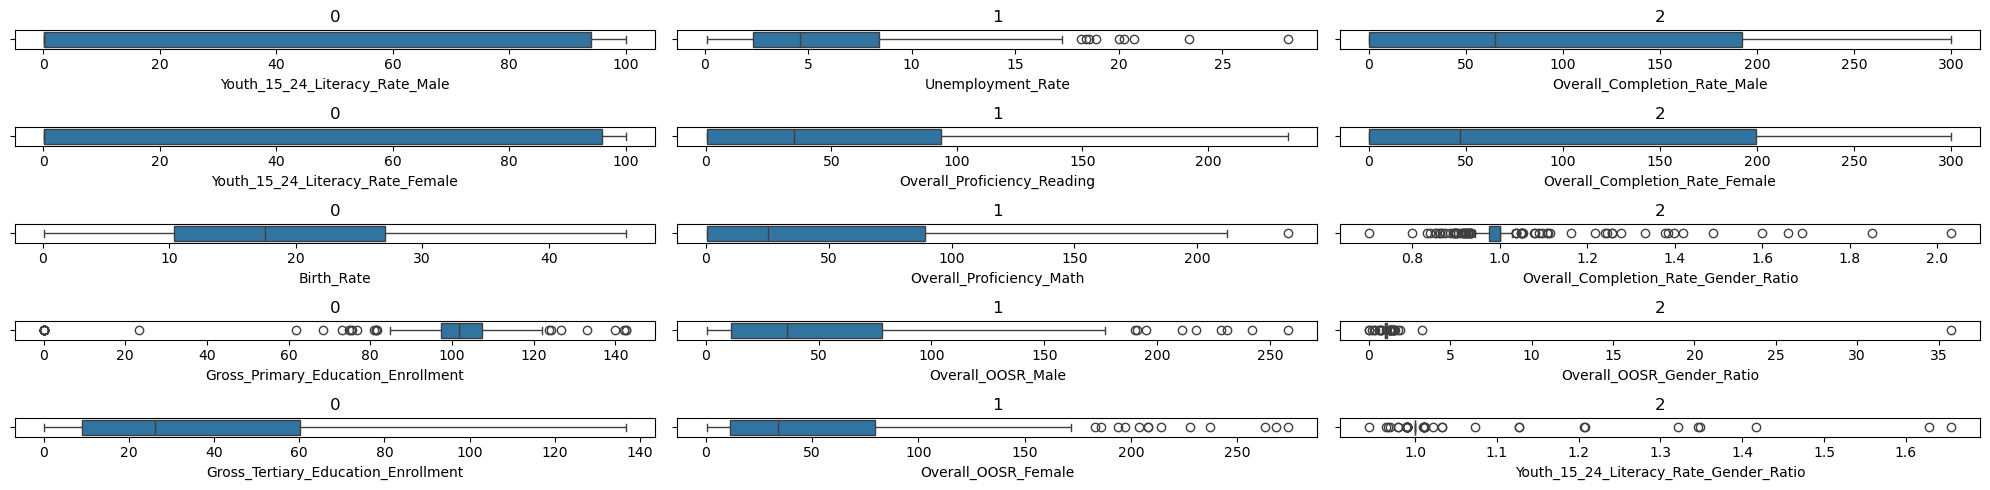

In [1034]:

columns_to_handle = [
    'Youth_15_24_Literacy_Rate_Male',
    'Youth_15_24_Literacy_Rate_Female', 'Birth_Rate',
    'Gross_Primary_Education_Enrollment',
    'Gross_Tertiary_Education_Enrollment', 'Unemployment_Rate',
    'Overall_Proficiency_Reading', 'Overall_Proficiency_Math',
    'Overall_OOSR_Male', 'Overall_OOSR_Female',
    'Overall_Completion_Rate_Male', 'Overall_Completion_Rate_Female',
    'Overall_Completion_Rate_Gender_Ratio', 'Overall_OOSR_Gender_Ratio',
    'Youth_15_24_Literacy_Rate_Gender_Ratio'  
]

num_cols = 3
num_rows = ceil(len(columns_to_handle) / num_cols)
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(20, 5))  # Change figsize as needed

# Plotting each column in a separate subplot
for i in range(len(columns_to_handle)):
    row = i % num_rows
    col = i // num_rows
    sns.boxplot(x=data[columns_to_handle[i]], ax=axes[row][col])
    axes[row][col].set_title(col)  # Set title for each subplot

plt.tight_layout()  # Adjust subplot parameters to give specified padding
plt.show()

## Removing Outliers

As per the above visualization of the boxplot, we can see that there are skewed data on the following features. 
* Unemployment_Rate
* Overall_Completion_Rate_Male
* Overall_Proficiency_Reading
* Overall_Completion_Rate_Female
* Birth_Rate
* Overall_Proficiency_Math
* Overall_Completion_Rate_Gender_Ratio
* Gross_Primary_Education_Enrollment
* Overall_OOSR_Male
* Overall_OOSR_Gender_Ratio
* Gross_Tertiary_Education_Enrollment
* Overall_OOSR_Female
* Youth_15_24_Literacy_Rate_Gender_Ratio

Let's remove the outliers from those features

In [1035]:

print(data.columns)
columns_to_handle = [
    "Unemployment_Rate",
    "Overall_Completion_Rate_Male",
    "Overall_Proficiency_Reading",
    "Overall_Completion_Rate_Female",
    "Birth_Rate",
    "Overall_Proficiency_Math",
    "Overall_Completion_Rate_Gender_Ratio",
    "Gross_Primary_Education_Enrollment",
    "Overall_OOSR_Male",
    "Overall_OOSR_Gender_Ratio",
    "Gross_Tertiary_Education_Enrollment",
    "Overall_OOSR_Female",
    "Youth_15_24_Literacy_Rate_Gender_Ratio"
]

# Assuming 'data' is your DataFrame containing the specified columns
for column in columns_to_handle:
    percentile25 = data[column].quantile(0.25)
    percentile75 = data[column].quantile(0.75)

    # Calculate IQR
    iqr = percentile75 - percentile25

    # Define lower and upper bounds for outliers
    lower_bound = percentile25 - 1.5 * iqr
    upper_bound = percentile75 + 1.5 * iqr

    # Remove outliers from the specified column
    data = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]

data

Index(['Latitude ', 'Longitude', 'OOSR_Pre0Primary_Age_Male',
       'OOSR_Pre0Primary_Age_Female', 'OOSR_Primary_Age_Male',
       'OOSR_Primary_Age_Female', 'OOSR_Lower_Secondary_Age_Male',
       'OOSR_Lower_Secondary_Age_Female', 'OOSR_Upper_Secondary_Age_Male',
       'OOSR_Upper_Secondary_Age_Female', 'Completion_Rate_Primary_Male',
       'Completion_Rate_Primary_Female',
       'Completion_Rate_Lower_Secondary_Male',
       'Completion_Rate_Lower_Secondary_Female',
       'Completion_Rate_Upper_Secondary_Male',
       'Completion_Rate_Upper_Secondary_Female',
       'Grade_2_3_Proficiency_Reading', 'Grade_2_3_Proficiency_Math',
       'Primary_End_Proficiency_Reading', 'Primary_End_Proficiency_Math',
       'Lower_Secondary_End_Proficiency_Reading',
       'Lower_Secondary_End_Proficiency_Math',
       'Youth_15_24_Literacy_Rate_Male', 'Youth_15_24_Literacy_Rate_Female',
       'Birth_Rate', 'Gross_Primary_Education_Enrollment',
       'Gross_Tertiary_Education_Enrollment', 'Un

,Latitude,Longitude,OOSR_Pre0Primary_Age_Male,OOSR_Pre0Primary_Age_Female,OOSR_Primary_Age_Male,OOSR_Primary_Age_Female,OOSR_Lower_Secondary_Age_Male,OOSR_Lower_Secondary_Age_Female,OOSR_Upper_Secondary_Age_Male,OOSR_Upper_Secondary_Age_Female,...,Overall_Completion_Rate_Female,Overall_Completion_Rate_Gender_Ratio,Overall_OOSR_Gender_Ratio,Youth_15_24_Literacy_Rate_Gender_Ratio,Continent_africa,Continent_asia,Continent_europe,Continent_north america,Continent_oceania,Continent_south america
3,42.506285,1.521801,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,...,0.3,1.000000,1.000000,1.0,0.0,0.0,1.0,0.0,0.0,0.0
9,25.274398,133.775136,13.0,14.0,0.1,0.1,2.0,3.0,10.0,6.0,...,0.3,1.000000,0.926199,1.0,0.0,0.0,0.0,0.0,1.0,0.0
10,47.516231,14.550072,0.1,0.1,0.1,0.1,1.0,0.1,10.0,9.0,...,0.3,1.000000,1.087379,1.0,0.0,0.0,1.0,0.0,0.0,0.0
15,13.193887,59.543198,6.0,10.0,1.0,2.0,7.0,3.0,7.0,3.0,...,294.0,0.979592,0.954545,1.0,0.0,0.0,0.0,1.0,0.0,0.0
21,16.290154,63.588653,9.0,8.0,5.0,5.0,13.0,14.0,22.0,22.0,...,0.3,1.000000,1.000000,1.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182,38.969719,59.556278,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,...,295.0,0.989831,1.000000,1.0,0.0,1.0,0.0,0.0,0.0,0.0
186,48.379433,31.165580,0.1,0.1,9.0,7.0,4.0,3.0,7.0,4.0,...,296.0,1.003378,1.175439,1.0,0.0,0.0,1.0,0.0,0.0,0.0
187,23.424076,53.847818,0.1,0.1,8.0,5.0,2.0,3.0,2.0,2.0,...,0.3,1.000000,1.198020,1.0,0.0,1.0,0.0,0.0,0.0,0.0
192,41.377491,64.585262,53.0,55.0,0.1,2.0,0.1,2.0,14.0,15.0,...,0.3,1.000000,0.920548,1.0,0.0,1.0,0.0,0.0,0.0,0.0


In [1036]:
num_entries = data.shape[0]  # Retrieves the number of rows in the DataFrame
print("Number of Countries remaining after removing outliers:", num_entries)

Number of Countries remaining after removing outliers: 63


In [1037]:

# drop inf values and NaN values
data = data.replace([np.inf, -np.inf], np.nan)
data = data.dropna()

data

,Latitude,Longitude,OOSR_Pre0Primary_Age_Male,OOSR_Pre0Primary_Age_Female,OOSR_Primary_Age_Male,OOSR_Primary_Age_Female,OOSR_Lower_Secondary_Age_Male,OOSR_Lower_Secondary_Age_Female,OOSR_Upper_Secondary_Age_Male,OOSR_Upper_Secondary_Age_Female,...,Overall_Completion_Rate_Female,Overall_Completion_Rate_Gender_Ratio,Overall_OOSR_Gender_Ratio,Youth_15_24_Literacy_Rate_Gender_Ratio,Continent_africa,Continent_asia,Continent_europe,Continent_north america,Continent_oceania,Continent_south america
3,42.506285,1.521801,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,...,0.3,1.000000,1.000000,1.0,0.0,0.0,1.0,0.0,0.0,0.0
9,25.274398,133.775136,13.0,14.0,0.1,0.1,2.0,3.0,10.0,6.0,...,0.3,1.000000,0.926199,1.0,0.0,0.0,0.0,0.0,1.0,0.0
10,47.516231,14.550072,0.1,0.1,0.1,0.1,1.0,0.1,10.0,9.0,...,0.3,1.000000,1.087379,1.0,0.0,0.0,1.0,0.0,0.0,0.0
15,13.193887,59.543198,6.0,10.0,1.0,2.0,7.0,3.0,7.0,3.0,...,294.0,0.979592,0.954545,1.0,0.0,0.0,0.0,1.0,0.0,0.0
21,16.290154,63.588653,9.0,8.0,5.0,5.0,13.0,14.0,22.0,22.0,...,0.3,1.000000,1.000000,1.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182,38.969719,59.556278,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,...,295.0,0.989831,1.000000,1.0,0.0,1.0,0.0,0.0,0.0,0.0
186,48.379433,31.165580,0.1,0.1,9.0,7.0,4.0,3.0,7.0,4.0,...,296.0,1.003378,1.175439,1.0,0.0,0.0,1.0,0.0,0.0,0.0
187,23.424076,53.847818,0.1,0.1,8.0,5.0,2.0,3.0,2.0,2.0,...,0.3,1.000000,1.198020,1.0,0.0,1.0,0.0,0.0,0.0,0.0
192,41.377491,64.585262,53.0,55.0,0.1,2.0,0.1,2.0,14.0,15.0,...,0.3,1.000000,0.920548,1.0,0.0,1.0,0.0,0.0,0.0,0.0


In [1038]:

# show the whole dataset
data.describe()

,Latitude,Longitude,OOSR_Pre0Primary_Age_Male,OOSR_Pre0Primary_Age_Female,OOSR_Primary_Age_Male,OOSR_Primary_Age_Female,OOSR_Lower_Secondary_Age_Male,OOSR_Lower_Secondary_Age_Female,OOSR_Upper_Secondary_Age_Male,OOSR_Upper_Secondary_Age_Female,...,Overall_Completion_Rate_Female,Overall_Completion_Rate_Gender_Ratio,Overall_OOSR_Gender_Ratio,Youth_15_24_Literacy_Rate_Gender_Ratio,Continent_africa,Continent_asia,Continent_europe,Continent_north america,Continent_oceania,Continent_south america
count,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,...,63.000000,63.000000,63.000000,63.0,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000
mean,36.162167,55.816916,10.480952,10.500000,1.969841,1.814286,3.334921,3.207937,10.636508,9.509524,...,61.788889,0.997605,1.013326,1.0,0.047619,0.269841,0.428571,0.111111,0.079365,0.063492
std,16.874925,46.944605,15.531735,15.578314,3.107879,2.923644,4.672402,4.204234,11.045059,10.424037,...,116.463119,0.007014,0.101181,0.0,0.214669,0.447443,0.498847,0.316794,0.272479,0.245805
min,1.831239,1.521801,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,...,0.300000,0.968085,0.785714,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,23.529288,17.246899,1.000000,1.000000,0.100000,0.100000,0.100000,0.100000,2.000000,2.000000,...,0.300000,1.000000,0.967996,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,40.463667,45.079162,5.000000,5.000000,1.000000,0.100000,1.000000,2.000000,7.000000,5.000000,...,0.300000,1.000000,1.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,48.199503,77.539337,12.000000,13.000000,2.000000,2.000000,4.000000,3.500000,16.000000,15.500000,...,0.300000,1.000000,1.053904,1.0,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
max,64.963051,174.885971,65.000000,65.000000,13.000000,13.000000,19.000000,17.000000,51.000000,57.000000,...,300.000000,1.010563,1.326087,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Implementing basic data preprocessing techniques
### Normalization
In this step, we will normalize the data using the MinMaxScaler. This will ensure that all the features are on the same scale. In our case, the scale will be between 0 and 1.

In [1039]:
scaled_data = preprocessing.MinMaxScaler().fit_transform(data)

data = pd.DataFrame(scaled_data, columns=data.columns)
data.describe()

,Latitude,Longitude,OOSR_Pre0Primary_Age_Male,OOSR_Pre0Primary_Age_Female,OOSR_Primary_Age_Male,OOSR_Primary_Age_Female,OOSR_Lower_Secondary_Age_Male,OOSR_Lower_Secondary_Age_Female,OOSR_Upper_Secondary_Age_Male,OOSR_Upper_Secondary_Age_Female,...,Overall_Completion_Rate_Female,Overall_Completion_Rate_Gender_Ratio,Overall_OOSR_Gender_Ratio,Youth_15_24_Literacy_Rate_Gender_Ratio,Continent_africa,Continent_asia,Continent_europe,Continent_north america,Continent_oceania,Continent_south america
count,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,...,63.000000,63.000000,63.000000,63.0,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000
mean,0.543798,0.313185,0.159953,0.160247,0.144949,0.132890,0.171160,0.183902,0.207004,0.165369,...,0.205168,0.694945,0.421212,0.0,0.047619,0.269841,0.428571,0.111111,0.079365,0.063492
std,0.267297,0.270786,0.239318,0.240036,0.240921,0.226639,0.247217,0.248771,0.216995,0.183199,...,0.388599,0.165128,0.187244,0.0,0.214669,0.447443,0.498847,0.316794,0.272479,0.245805
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.343694,0.090706,0.013867,0.013867,0.000000,0.000000,0.000000,0.000000,0.037328,0.033392,...,0.000000,0.751323,0.337326,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.611933,0.251248,0.075501,0.075501,0.069767,0.000000,0.047619,0.112426,0.135560,0.086116,...,0.000000,0.751323,0.396552,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.734467,0.438485,0.183359,0.198767,0.147287,0.147287,0.206349,0.201183,0.312377,0.270650,...,0.000000,0.751323,0.496306,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [1040]:
data.columns

Index(['Latitude ', 'Longitude', 'OOSR_Pre0Primary_Age_Male',
       'OOSR_Pre0Primary_Age_Female', 'OOSR_Primary_Age_Male',
       'OOSR_Primary_Age_Female', 'OOSR_Lower_Secondary_Age_Male',
       'OOSR_Lower_Secondary_Age_Female', 'OOSR_Upper_Secondary_Age_Male',
       'OOSR_Upper_Secondary_Age_Female', 'Completion_Rate_Primary_Male',
       'Completion_Rate_Primary_Female',
       'Completion_Rate_Lower_Secondary_Male',
       'Completion_Rate_Lower_Secondary_Female',
       'Completion_Rate_Upper_Secondary_Male',
       'Completion_Rate_Upper_Secondary_Female',
       'Grade_2_3_Proficiency_Reading', 'Grade_2_3_Proficiency_Math',
       'Primary_End_Proficiency_Reading', 'Primary_End_Proficiency_Math',
       'Lower_Secondary_End_Proficiency_Reading',
       'Lower_Secondary_End_Proficiency_Math',
       'Youth_15_24_Literacy_Rate_Male', 'Youth_15_24_Literacy_Rate_Female',
       'Birth_Rate', 'Gross_Primary_Education_Enrollment',
       'Gross_Tertiary_Education_Enrollment', 'Un

In [1041]:
data

,Latitude,Longitude,OOSR_Pre0Primary_Age_Male,OOSR_Pre0Primary_Age_Female,OOSR_Primary_Age_Male,OOSR_Primary_Age_Female,OOSR_Lower_Secondary_Age_Male,OOSR_Lower_Secondary_Age_Female,OOSR_Upper_Secondary_Age_Male,OOSR_Upper_Secondary_Age_Female,...,Overall_Completion_Rate_Female,Overall_Completion_Rate_Gender_Ratio,Overall_OOSR_Gender_Ratio,Youth_15_24_Literacy_Rate_Gender_Ratio,Continent_africa,Continent_asia,Continent_europe,Continent_north america,Continent_oceania,Continent_south america
0,0.644288,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.751323,0.396552,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.371337,0.762864,0.198767,0.214176,0.000000,0.000000,0.100529,0.171598,0.194499,0.103691,...,0.000000,0.751323,0.259978,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.723645,0.075150,0.000000,0.000000,0.000000,0.000000,0.047619,0.000000,0.194499,0.156415,...,0.000000,0.751323,0.558252,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.179983,0.334679,0.090909,0.152542,0.069767,0.147287,0.365079,0.171598,0.135560,0.050967,...,0.979980,0.270885,0.312435,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.229027,0.358014,0.137134,0.121726,0.379845,0.379845,0.682540,0.822485,0.430255,0.384886,...,0.000000,0.751323,0.396552,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,0.588269,0.334755,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.983317,0.511918,0.396552,0.0,0.0,1.0,0.0,0.0,0.0,0.0
59,0.737318,0.170991,0.000000,0.000000,0.689922,0.534884,0.206349,0.171598,0.135560,0.068541,...,0.986653,0.830855,0.721214,0.0,0.0,0.0,1.0,0.0,0.0,0.0
60,0.342028,0.301827,0.000000,0.000000,0.612403,0.379845,0.100529,0.171598,0.037328,0.033392,...,0.000000,0.751323,0.763002,0.0,0.0,1.0,0.0,0.0,0.0,0.0
61,0.626408,0.363763,0.815100,0.845917,0.000000,0.147287,0.000000,0.112426,0.273084,0.261863,...,0.000000,0.751323,0.249520,0.0,0.0,1.0,0.0,0.0,0.0,0.0


## Feature Selection
In this step we select the features that are important for our model. We can use

In [1042]:
print(f'Original Number Of Features: {data.columns.__len__()}')
selector = VarianceThreshold(threshold=0)
selector.fit(data)

filtered_cols = data.columns[selector.get_support()]
df = data[filtered_cols]
df.head()

selector2 = VarianceThreshold(threshold=0.04)
selector2.fit(df)

filtered_cols = df.columns[selector2.get_support()]  

filtered_cols = df.columns[selector2.get_support()]
df = df[filtered_cols]
df.head()

# print(df.columns.__len__())
print(f'Number Of Features After Variance Thresholding: {df.columns.__len__()}')

removed_columns = [col for col in data.columns if col not in filtered_cols]
print("Removed Features:", removed_columns)

print("Filtered Features:", filtered_cols.to_list())

Original Number Of Features: 43
Number Of Features After Variance Thresholding: 38
Removed Features: ['OOSR_Upper_Secondary_Age_Female', 'Gross_Primary_Education_Enrollment', 'Overall_Completion_Rate_Gender_Ratio', 'Overall_OOSR_Gender_Ratio', 'Youth_15_24_Literacy_Rate_Gender_Ratio']
Filtered Features: ['Latitude ', 'Longitude', 'OOSR_Pre0Primary_Age_Male', 'OOSR_Pre0Primary_Age_Female', 'OOSR_Primary_Age_Male', 'OOSR_Primary_Age_Female', 'OOSR_Lower_Secondary_Age_Male', 'OOSR_Lower_Secondary_Age_Female', 'OOSR_Upper_Secondary_Age_Male', 'Completion_Rate_Primary_Male', 'Completion_Rate_Primary_Female', 'Completion_Rate_Lower_Secondary_Male', 'Completion_Rate_Lower_Secondary_Female', 'Completion_Rate_Upper_Secondary_Male', 'Completion_Rate_Upper_Secondary_Female', 'Grade_2_3_Proficiency_Reading', 'Grade_2_3_Proficiency_Math', 'Primary_End_Proficiency_Reading', 'Primary_End_Proficiency_Math', 'Lower_Secondary_End_Proficiency_Reading', 'Lower_Secondary_End_Proficiency_Math', 'Youth_15_24